## Name : Pravin Nandankar
## Roll NO : 58
## Batch : C4
## Machine Learning Internal 2 (p1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("water_potability.csv");

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [47]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [49]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [50]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [51]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [52]:
df.duplicated().sum()   ## its 0 no need to handle

0

In [53]:
# Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

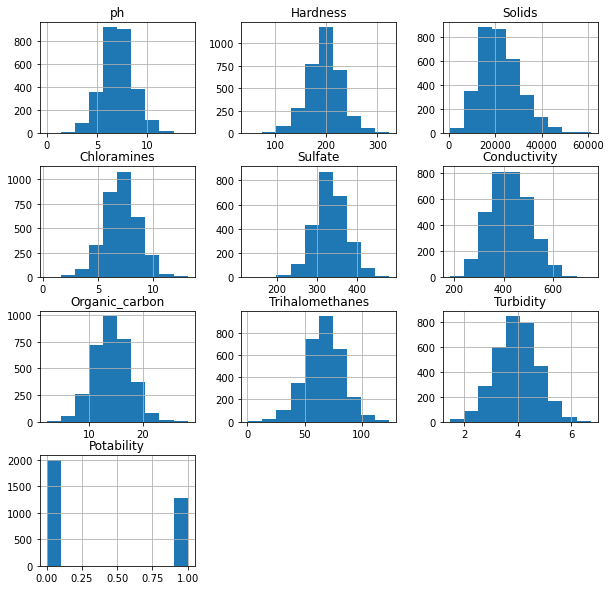

In [55]:
# Histograms for numerical features
df.hist(figsize=(10, 10))
plt.show()

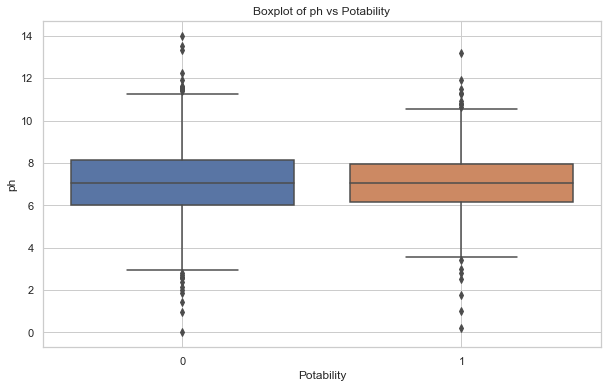

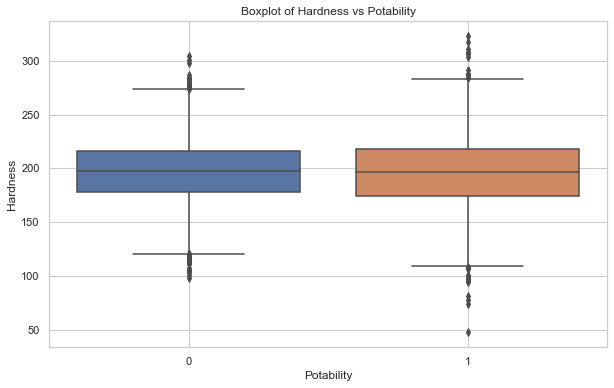

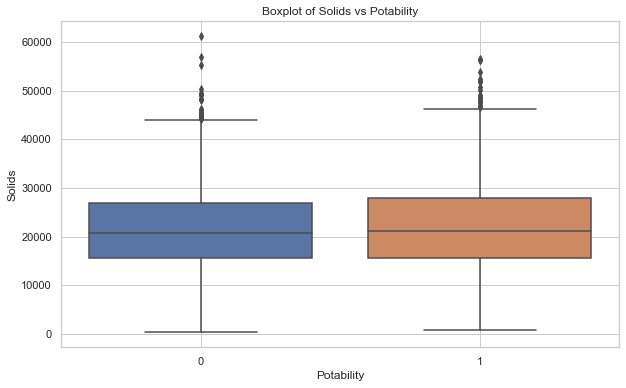

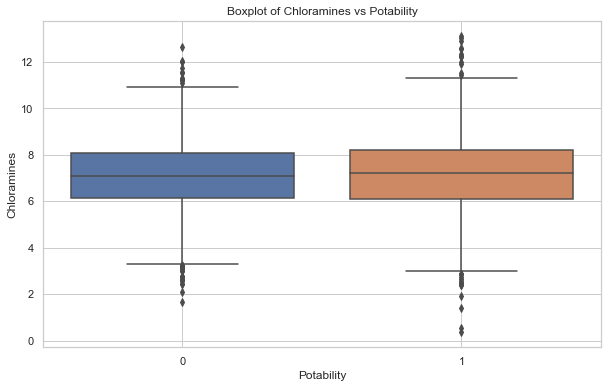

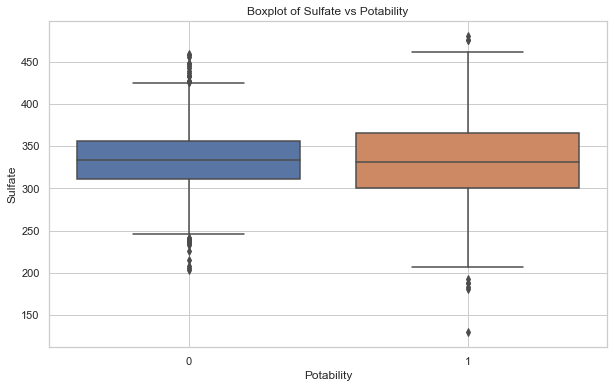

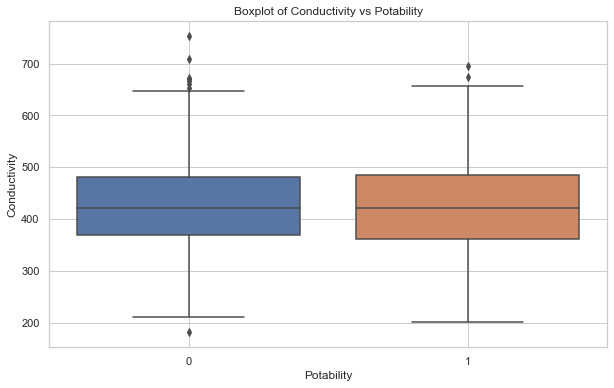

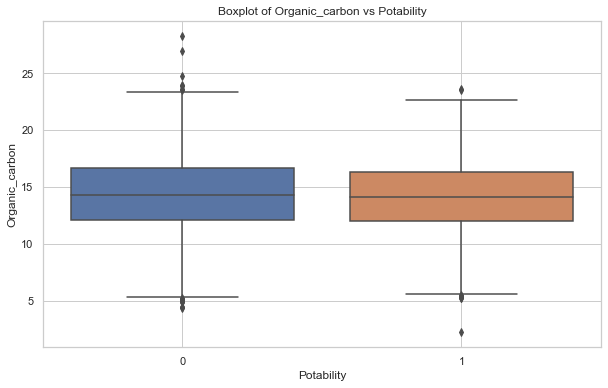

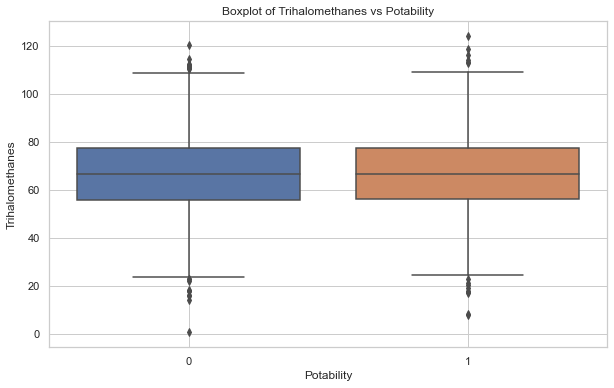

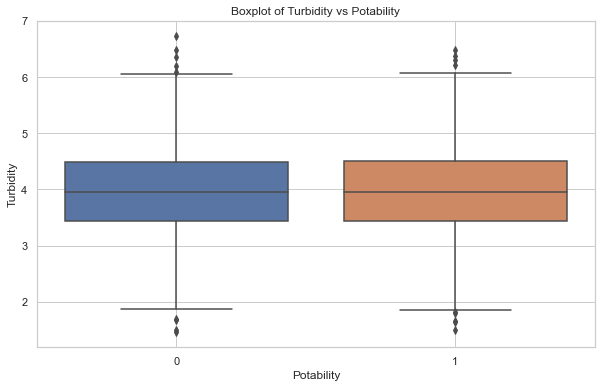

In [69]:
# List of features to plot against 'Potability'
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 
            'Turbidity']

# Create boxplots for each feature Bivariate
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs Potability')
    plt.xlabel('Potability')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

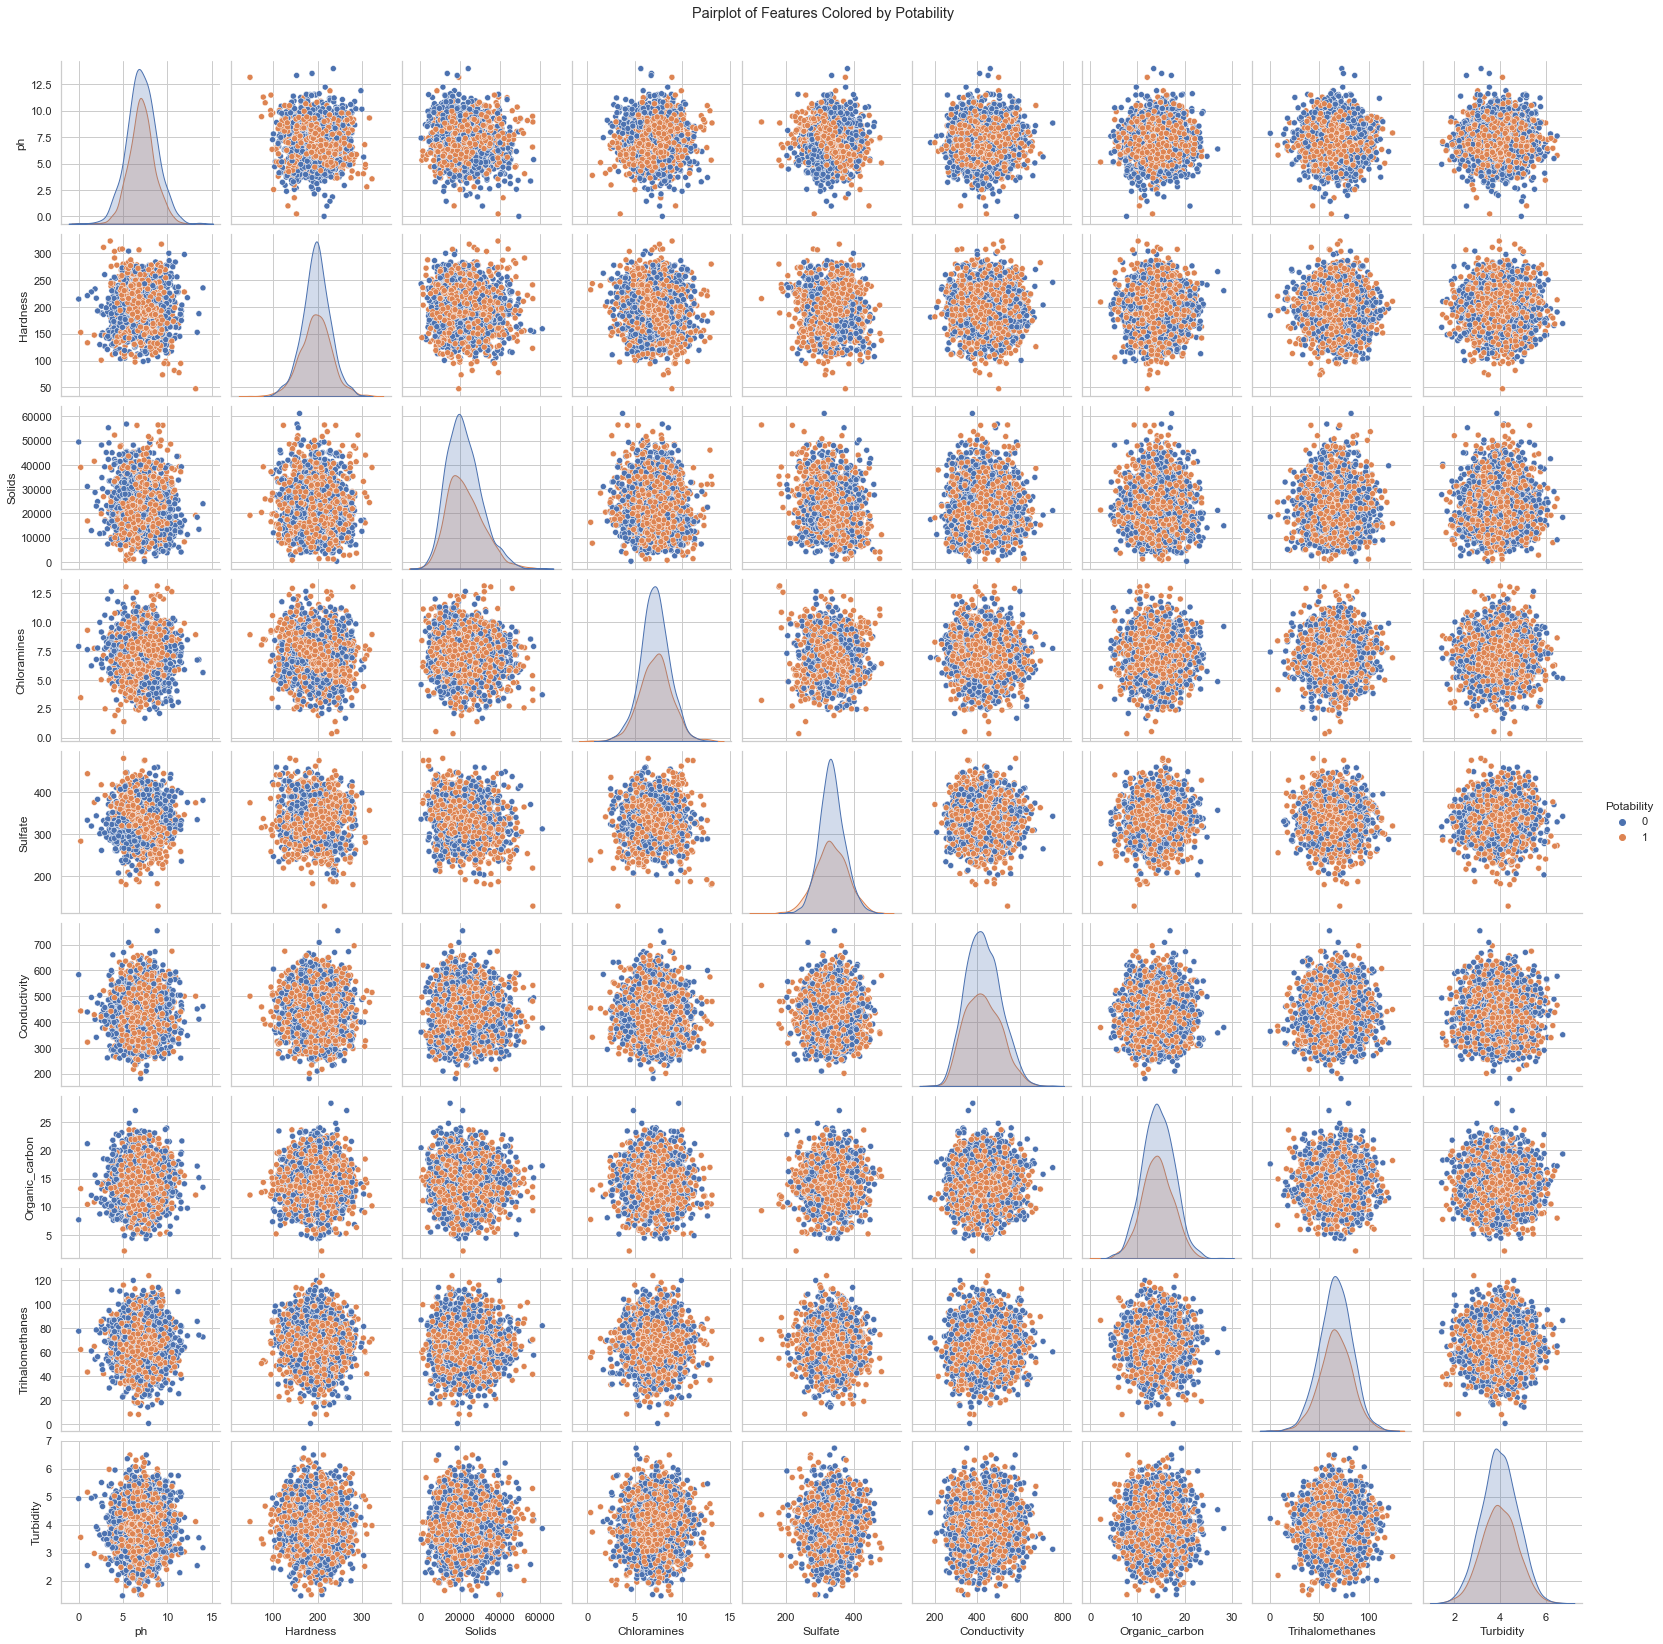

In [68]:
# Create a pairplot
sns.pairplot(df, hue='Potability', vars=features)
plt.suptitle("Pairplot of Features Colored by Potability", y=1.02)
plt.show()

In [71]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

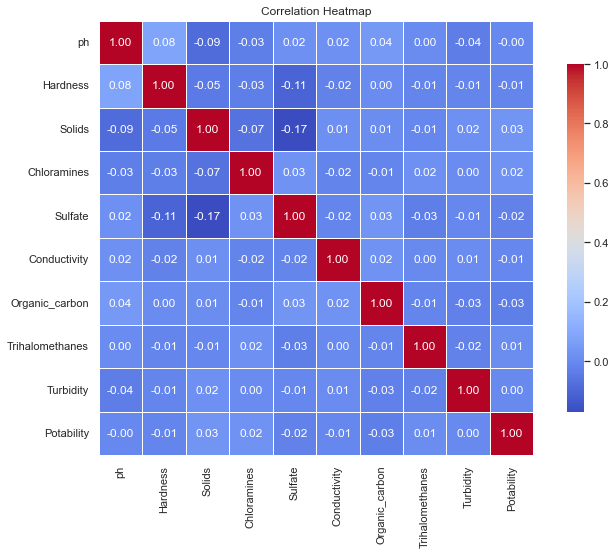

In [72]:
# Set the aesthetics for the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Split the data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
X_train.shape

(2293, 9)

In [8]:
rd = RandomForestClassifier(n_estimators=100, random_state=0)

rd.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [9]:
y_pred = rd.predict(X_test)

In [10]:
# Evaluate the performance of the classifier
accuracy = rd.score(X_test, y_test)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.68


In [11]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:


NameError: name 'classification_report' is not defined

#### Applying hyper paramter on Random Forest

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [25]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [26]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [27]:
# Retrieve the best model from GridSearchCV or RandomizedSearchCV
best_rf = grid_search.best_estimator_  # or random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.9566666666666667


In [28]:
# Make predictions for train dataset
pred = best_rf.predict(X_train)

In [29]:
accuracy = accuracy_score(y_train, pred)
print("Train accuracy: ", accuracy)

Train accuracy:  1.0


### AdaBoost

In [30]:
from sklearn.metrics import classification_report
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [34]:
y_pred_ab = ada_classifier.predict(X_test)

In [35]:
print("Adaboost Classification Report:")
print(classification_report(y_test, y_pred_ab))

Adaboost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       141
           1       0.97      0.86      0.91       159

    accuracy                           0.91       300
   macro avg       0.92      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred_ab))

Accuracy: 0.9133333333333333


#### Applying hyper paramter on adaboost

In [16]:
# Initialize the AdaBoost model
ada = AdaBoostClassifier()

In [37]:
import pickle

In [39]:
# Save the model to a file
with open('Water_quality_prediction.pkl', 'wb') as model_file:
    pickle.dump(rd, model_file)

print("Model saved successfully!")

Model saved successfully!
